In [ ]:
#connect google colab with google drive
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/train.zip')


#extracts the files into the /MajorProject folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()

In [ ]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/validation.zip')

#extracts the files into the /MajorProject folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()



In [ ]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/test.zip')

#extracts the files into the /MajorProject folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()

In [ ]:
import os
import glob

folder_path = '/content/gdrive/MyDrive/MajorProject/br35hdataset/train'  # replace with the actual folder path

yes_path = os.path.join(folder_path, 'yes')
no_path = os.path.join(folder_path, 'no')

yes_count = len(glob.glob(os.path.join(yes_path, '*.jpg')))  # replace '*.jpg' with the actual file extension of your images
no_count = len(glob.glob(os.path.join(no_path, '*.jpg')))  # replace '*.jpg' with the actual file extension of your images

print(f'Total images in "yes" folder: {yes_count}')
print(f'Total images in "no" folder: {no_count}')
print(yes_count+no_count)


Total images in "yes" folder: 7180
Total images in "no" folder: 7220
14400


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
# Define data generators for training, validation, and testing sets
train_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory('/content/gdrive/MyDrive/MajorProject/br35hdataset/train',
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='binary')

valid_generator = valid_datagen.flow_from_directory('/content/gdrive/MyDrive/MajorProject/br35hdataset/validation',
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('/content/gdrive/MyDrive/MajorProject/br35hdataset/test',
                                                  target_size=(256, 256),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 14400 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [ ]:
input_shape=(256,256,3)

In [ ]:
# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

In [ ]:
# Add a fully connected layer
x = Dense(512, activation='relu')(x)

In [ ]:
# Add the final classification layer
predictions = Dense(2, activation='softmax')(x)

In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=valid_generator
)

Epoch 1/30
450/450 [==============================] - 140s 279ms/step - loss: 0.4219 - accuracy: 0.7934 - val_loss: 0.2958 - val_accuracy: 0.8683
Epoch 2/30
450/450 [==============================] - 119s 263ms/step - loss: 0.2846 - accuracy: 0.8771 - val_loss: 0.2403 - val_accuracy: 0.8983
Epoch 3/30
450/450 [==============================] - 118s 261ms/step - loss: 0.2427 - accuracy: 0.8956 - val_loss: 0.1929 - val_accuracy: 0.9244
Epoch 4/30
450/450 [==============================] - 124s 274ms/step - loss: 0.2098 - accuracy: 0.9117 - val_loss: 0.1660 - val_accuracy: 0.9350
Epoch 5/30
450/450 [==============================] - 125s 278ms/step - loss: 0.1999 - accuracy: 0.9182 - val_loss: 0.1533 - val_accuracy: 0.9400
Epoch 6/30
450/450 [==============================] - 114s 253ms/step - loss: 0.1693 - accuracy: 0.9306 - val_loss: 0.2446 - val_accuracy: 0.8983
Epoch 7/30
450/450 [==============================] - 120s 267ms/step - loss: 0.1553 - accuracy: 0.9391 - val_loss: 0.1325 -

In [ ]:
# Save the model
model.save('/content/gdrive/MyDrive/MajorProject/vgg19.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
vgg19_model = load_model('/content/gdrive/MyDrive/MajorProject/vgg19.h5')

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

57/57 [==============================] - 13s 220ms/step - loss: 0.0627 - accuracy: 0.9783
Test Loss: 0.06269051879644394
Test Accuracy: 0.9783333539962769


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('/content/gdrive/MyDrive/MajorProject/br35hdataset/test',
                                                  target_size=(256, 256),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 1800 images belonging to 2 classes.


57/57 [==============================] - 1187s 21s/step


NameError: ignored

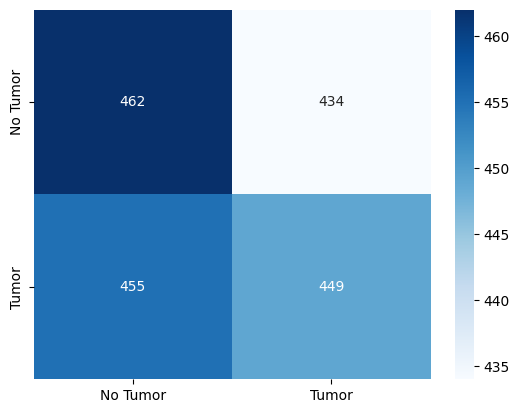

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions for the test data
y_pred = vgg19_model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the test data
y_true = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tumor', 'Tumor'],
            yticklabels=['No Tumor', 'Tumor'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
X_test, y_test = test_generator.next()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the predicted labels for the test data
y_pred = vgg19_model.predict(X_test)

# Convert the predicted labels to binary values (0 or 1)
y_pred_binary = np.argmax(y_pred, axis=1)

# Calculate precision, recall, sensitivity, specificity, f1 score, and f beta score
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
sensitivity = recall
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
beta = 2
f_beta_score = (1 + beta ** 2) * (precision * recall) / (beta ** 2 * precision + recall)

# Print the metrics
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))
print("F1 Score: {:.4f}".format(f1_score))
print("F Beta Score: {:.4f}".format(f_beta_score))

1/1 [==============================] - 22s 22s/step
Precision: 0.5085
Recall: 0.4967
Sensitivity: 0.4967
Specificity: 0.5156
F1 Score: 0.5025
F Beta Score: 0.4990


In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Plot training and test loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:

# Plot training and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()